In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Kaavioiden tyyliasetus (ei ole pakollinen)
plt.style.use('seaborn-whitegrid')

# Jotkin kirjastoversiot eivät osaa automaattisesti säätää jakoviivoja mielekkäällä tavalla
# Siispä tuunaan oman Locatorin ja Formatterin
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

# Tätä käyttäen voin säätää kaavion vaaka-akselin jakoviivat 14 päivän välein
myLoc = MultipleLocator(14)

# Tätä käyttäen voin esittää kaavion vaaka-akselin jakoviivat muodossa 13/01
myFmt = DateFormatter('%d/%m')

In [61]:
# Datojen avaaminen
elisa = pd.read_csv('ELISA-2015-01-01-2020-12-31.csv', sep = ';', decimal = ',')
telia = pd.read_csv('TELIA1-2015-01-01-2020-12-31.csv', sep = ';', decimal = ',')

# Katsotaan miltä data näyttää
elisa.head()
elisa.tail

<bound method NDFrame.tail of             Date    Bid    Ask  Opening price  High price  Low price  \
0     30.12.2020  45.05  45.07          45.20       45.48      44.87   
1     29.12.2020  45.19  45.20          44.51       45.33      44.51   
2     28.12.2020  44.42  44.45          44.68       44.83      44.33   
3     23.12.2020  44.61  44.64          44.40       44.83      44.39   
4     22.12.2020  44.42  44.43          44.25       44.49      44.12   
...          ...    ...    ...            ...         ...        ...   
1502    9.1.2015  22.86  22.87          22.81       23.12      22.76   
1503    8.1.2015  22.83  22.84          22.90       23.20      22.76   
1504    7.1.2015  22.91  22.92          22.50       23.14      22.10   
1505    5.1.2015  22.38  22.40          22.70       22.85      22.31   
1506    2.1.2015  22.68  22.70          22.61       22.87      22.55   

      Closing price  Average price  Total volume     Turnover  Trades  
0             44.87         45.07

In [69]:
telia.head()
telia.tail

<bound method NDFrame.tail of             Date    Bid    Ask  Opening price  High price  Low price  \
0     30.12.2020  3.386  3.390          3.400       3.415      3.378   
1     29.12.2020  3.398  3.400          3.370       3.415      3.370   
2     28.12.2020  3.359  3.362          3.377       3.388      3.350   
3     23.12.2020  3.355  3.356          3.330       3.360      3.329   
4     22.12.2020  3.327  3.329          3.318       3.342      3.306   
...          ...    ...    ...            ...         ...        ...   
1502    9.1.2015  5.290  5.295          5.400       5.420      5.290   
1503    8.1.2015  5.405  5.410          5.260       5.410      5.260   
1504    7.1.2015  5.230  5.245          5.240       5.300      5.220   
1505    5.1.2015  5.205  5.215          5.290       5.300      5.205   
1506    2.1.2015  5.300  5.305          5.340       5.360      5.285   

      Closing price  Average price  Total volume     Turnover  Trades  \
0             3.380          3.3

In [70]:
# Aikaleimat indeksiin
elisa.index = pd.to_datetime(elisa['Date'])
telia.index = pd.to_datetime(telia['Date'])

# Järjestys vanhimmasta uusimpaan
elisa = elisa.sort_index()
telia = telia.sort_index()

# Katsotaan onnistuiko
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Telia%
Date,,,,,,,,,,,,
2015-01-04,1.4.2015,5.880,5.895,5.93,5.930,5.870,5.895,5.899,1845871,1.088920e+07,1242,0.008554
2015-01-06,1.6.2015,5.350,5.360,5.37,5.395,5.330,5.360,5.354,1161839,6.220238e+06,745,0.003745
2015-01-07,1.7.2015,5.305,5.315,5.27,5.390,5.270,5.315,5.340,883168,4.715787e+06,612,0.009497
2015-01-09,1.9.2015,4.904,4.918,4.98,4.980,4.894,4.904,4.925,840701,4.140599e+06,957,-0.009293
2015-01-10,1.10.2015,4.672,4.676,4.83,4.854,4.656,4.672,4.755,890742,4.235585e+06,963,0.017865


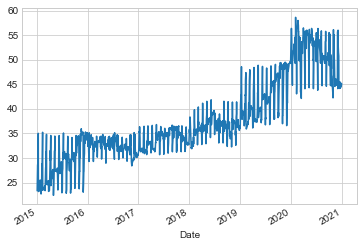

In [71]:
#viivakaavio
elisa['Closing price'].plot()

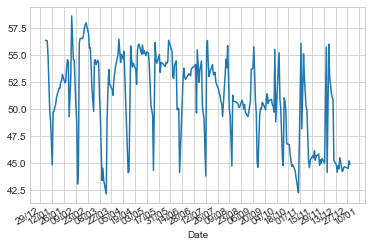

In [72]:
# Vuoden 2020 alusta
ax1 = elisa['Closing price']['2020':].plot()

# Aika-akselin jakoviivojen tuunaus
ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

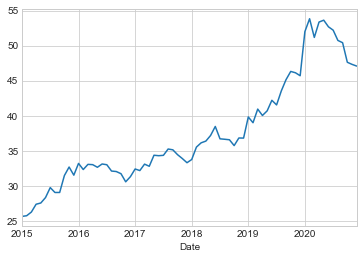

In [73]:
# Kuukausittaiset keskiarvohinnat
elisa['Closing price'].resample('M').mean().plot()

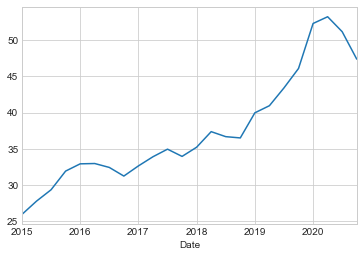

In [74]:
# Vuosineljännesten keskiarvohinnat
elisa['Closing price'].resample('Q').mean().plot()

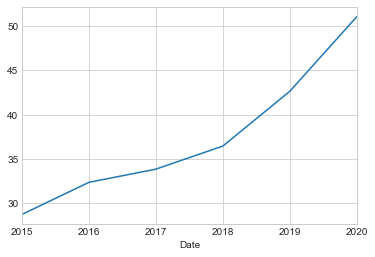

In [75]:
# Vuosien keskiarvohinnat
elisa['Closing price'].resample('Y').mean().plot()

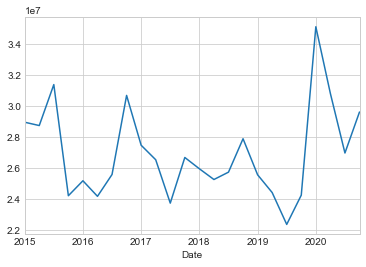

In [76]:
# Vaihto osakkeiden lukumääränä vuosineljänneksittäin
elisa['Total volume'].resample('Q').sum().plot()

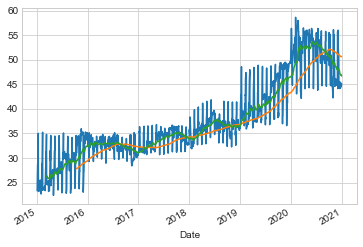

In [109]:
elisa['Closing price'].plot()

# Lisätään viivakaavioon 50 päivän ja 200 päivän liukuvat keskiarvot
elisa['Closing price'].rolling(200).mean().plot()
elisa['Closing price'].rolling(50).mean().plot()

In [78]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Closing price'].pct_change()
telia['Telia%'] = telia['Closing price'].pct_change()

In [96]:
# Yhdistän Elisan ja Telian muutosprosentit samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)
muutokset.head()

,Elisa%,Telia%
Date,,
2015-01-04,NaN,NaN
2015-01-06,0.201886,-0.090755
2015-01-07,0.018902,-0.008396
2015-01-09,0.012601,-0.077328
2015-01-10,0.040097,-0.047308


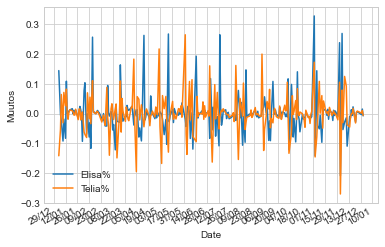

In [110]:
# Muutokset vuoden alusta
ax2 = muutokset['2020':].plot()

ax2.set_ylabel('Muutos')

# Aika-akselin jakoviivojen tuunaus
ax2.xaxis.set_major_locator(myLoc)
ax2.xaxis.set_major_formatter(myFmt)

In [83]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1506.000000,1506.000000
mean,0.002140,0.000713
std,0.057431,0.047016
min,-0.346285,-0.270092
25%,-0.011148,-0.015016
50%,0.001208,-0.000990
75%,0.016329,0.012536
max,0.328598,0.285714


In [107]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 25 %
muutokset[(abs(muutokset['Elisa%']) > 0.25) | (abs(muutokset['Telia%']) > 0.25)]

,Elisa%,Telia%
Date,,
2015-01-13,-0.323437,0.162318
2015-02-13,-0.334847,0.172971
2015-03-13,-0.291583,0.256516
2015-04-13,-0.295172,0.214953
2015-08-01,-0.255624,-0.020833
2015-11-02,-0.307760,0.160256
2015-12-01,-0.346285,0.143686
2016-03-14,0.097084,0.285714
2020-02-13,0.257284,0.110922


In [85]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,270.0,-0.001468,0.064177,-0.307760,-0.010406,0.000832,0.014703,0.328598
1,263.0,0.001650,0.055602,-0.346285,-0.010065,0.001854,0.016630,0.263229
2,276.0,0.005300,0.055010,-0.218869,-0.010508,0.000676,0.014089,0.267885
3,271.0,0.002025,0.045605,-0.208468,-0.012501,0.001176,0.012229,0.257284
4,263.0,-0.000492,0.055340,-0.334847,-0.009035,0.001112,0.013453,0.206852
5,76.0,0.009829,0.074300,-0.255624,-0.029041,0.005352,0.057797,0.269719
6,87.0,0.006393,0.070023,-0.171547,-0.038892,0.005412,0.049954,0.176379


In [86]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,270.0,0.004015,0.049124,-0.127913,-0.015541,-0.001394,0.016215,0.285714
1,263.0,0.001859,0.045708,-0.167474,-0.011117,-0.000517,0.011086,0.265326
2,276.0,0.001192,0.042617,-0.150909,-0.010694,-0.001305,0.011624,0.241714
3,271.0,0.000118,0.047322,-0.270092,-0.012701,-0.000826,0.010852,0.213581
4,263.0,-0.000340,0.040893,-0.148782,-0.016827,0.000000,0.010900,0.256516
5,76.0,-0.005578,0.064415,-0.162892,-0.048134,-0.010327,0.028614,0.217623
6,87.0,-0.003980,0.055843,-0.194967,-0.029801,-0.007764,0.029471,0.133866


In [87]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.058464
Telia%,0.058464,1.000000


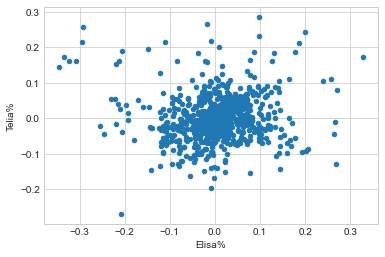

In [88]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x = 'Elisa%', y = 'Telia%')

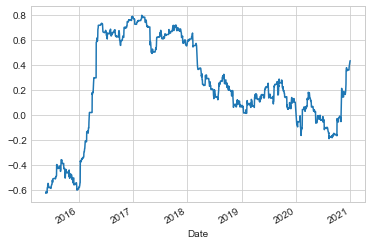

In [89]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

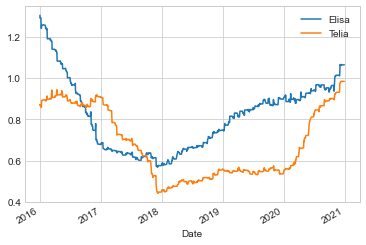

In [90]:
# 252 päivän liukuva volatiliteetti
(muutokset['Elisa%'].rolling(252).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(252).std() * (252**0.5)).plot(label = 'Telia', legend = True)

(3.0, 7.0)

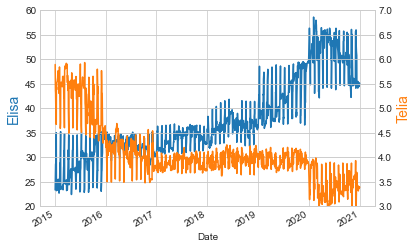

In [91]:
# Viivakaavio Elisan päätöshinnoista (ax3)
ax3 = elisa['Closing price'].plot(color = 'C0')
ax3.set_ylabel('Elisa', color='C0', fontsize=14)
ax3.set_ylim(20,60)

# Luon Telialle toisen axes-olion (ax4), jolla on yhteinen x-akseli ax3-olion kanssa
ax4 = ax3.twinx()
telia['Closing price'].plot(ax = ax4, color='C1')
ax4.set_ylabel('Telia', color='C1', fontsize=14)
ax4.set_ylim(3,7)